# PV3 Result visualisations

<img src="http://reiner-lemoine-institut.de//wp-content/uploads/2015/09/rlilogo.png" width="100" style="float: right">

__copyright__ 	= "© Reiner Lemoine Institut" <br>
__license__ 	= "GNU Affero General Public License Version 3 (AGPL-3.0)" <br>
__url__ 		= "https://www.gnu.org/licenses/agpl-3.0.en.html" <br>
__author__ 		= "Ludwig Hülk" <br>

# Imports

In [1]:
import sys
import os
import getpass
import pandas as pd
import numpy as np
import json
from sqlalchemy import *
# plot
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.graph_objs as go
import plotly.offline as pltly
import colorlover as cl
import seaborn as sns
# notebook
from IPython.display import Image
from IPython.core.display import HTML 

pltly.init_notebook_mode(connected=True)
%matplotlib inline

version = 'v1 (jupyter)'
project = 'pv3'

# Read Data

Add results files as CSV in the data folder.
Must contain two columns: month, value.

In [2]:
file_name = 'data/2015_SonnJA_Abrechnung_Einspeisung.csv'
df_feedin_billing = pd.read_csv(file_name, encoding='latin1', sep=';', index_col=0, parse_dates=True)
df_feedin_billing

,Einspeisung in kWh
Monat,
Jan,211
Feb,758
Mrz,1199
Apr,1920
Mai,2176
Jun,2270
Jul,2399
Aug,2365
Sep,1449


# Metadata

The important information from the above select (**df**) is collected in a Dictionary (**info_dict**).

In [3]:
# Facts dict
info_dict = {}
info_dict['Filename'] = ['{}_pv3_sonnja_results'.format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
info_dict['Value'] = ['Einspeisung (E_AC)']
info_dict['Unit'] = ['kWh']
info_dict['Y-Axis'] = ['{} in {}'.format(*info_dict['Value'], *info_dict['Unit'])]
info_dict['X-Axis'] = ['Monat']
info_dict['Title'] = ['Einspeisung pro Monat']
# info_dict['Metadata'] = [meta_str]

# Print facts
# for x in info_dict:
#     print(x,':',info_dict[x])

## Plot with Metadata

(0.0, 2518.95)

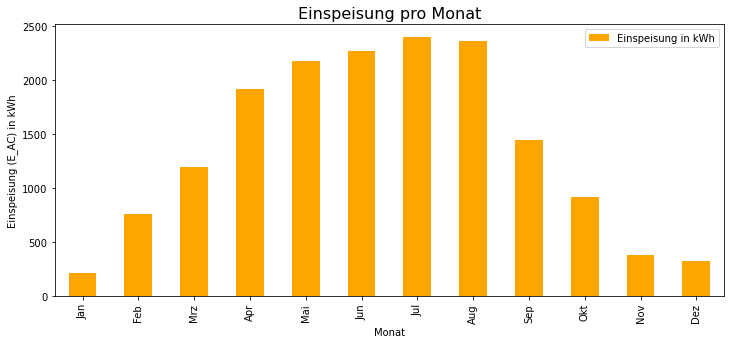

In [4]:
# Bar plot
mfig_feedin = plt.figure(figsize=(12, 5))
ax = plt.subplot()
plt.title(*info_dict['Title'], fontsize=16)         # Title from info
plt.ylabel(*info_dict['Y-Axis'])                    # Label from info
df_feedin_billing.plot.bar(ax=ax, color='orange')
ax.set_ylim(ymin=0)

## Interactive Plot with Metadata

In [5]:
# Interactive bar plot
sns.set_style('ticks')
trace_line = go.Scatter(x=df_feedin_billing.index.tolist(), 
                        y=df_feedin_billing['Einspeisung in kWh'].tolist(), 
                        name='Einspeisung Abrechnung', line=dict(), mode='lines')
trace_bar = go.Bar(x=df_feedin_billing.index.tolist(), 
                   y=df_feedin_billing['Einspeisung in kWh'].tolist(), 
                   name='Einspeisung Abrechnung', marker=dict())
layout = go.Layout(
    title='Einspeisung pro Monat',
    yaxis=dict(title=''.join(info_dict['Y-Axis'])),
    xaxis=dict(title=''.join(info_dict['X-Axis']))
)
ifig_feedin = go.Figure(data=[trace_bar, trace_line], layout=layout)
pltly.iplot(ifig_feedin)

## Save results to files

The results are saved to cooresponding files in a folder named **data**.<br>
The **info_dict** is saved to a text file (txt).<br>
The **data** is saved to a table (csv).<br>
The **plot** is saved as an image (png).<br>
The **interactive plot** is saved as a webpage (html). It will also open in a new tab of your browser.

In [6]:
# Write facts to textfile
txtname = ('data/{}.txt').format(*info_dict['Filename'])
with open(txtname,'w') as tfile:
    for i in info_dict.keys():
        tfile.write(i + ": " + ', '.join([str(x) for x in info_dict[i]]) + "\n")
tfile.close()
print("Facts saved to file:", txtname)

# Save plot as file
plotname = 'data/{}_mfig_feedin.png' .format(*info_dict['Filename'])
mfig_feedin.savefig(plotname, bbox_inches='tight')
print("Plot saved to file:", plotname)

# Save interactive plot as file
htmlname = 'data/{}_ifig_feedin.html' .format(*info_dict['Filename'])
pltly.plot(ifig_feedin, filename=htmlname)
print("Plot saved to file:", htmlname)

Facts saved to file: data/2021-07-13_pv3_sonnja_results.txt
Plot saved to file: data/2021-07-13_pv3_sonnja_results_mfig_feedin.png
Plot saved to file: data/2021-07-13_pv3_sonnja_results_ifig_feedin.html


## Annual yield

In [7]:
res_feedin_billing = df_feedin_billing['Einspeisung in kWh'].sum()
print(round(res_feedin_billing,1))

16377
